In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("health-insurance-indicators.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Indicator            1407 non-null   object 
 1   Group                1407 non-null   object 
 2   State                1407 non-null   object 
 3   Subgroup             1407 non-null   object 
 4   Week                 1407 non-null   int64  
 5   Week Label           1407 non-null   object 
 6   Value                1388 non-null   float64
 7   Low CI               1388 non-null   float64
 8   High CI              1388 non-null   float64
 9   Confidence Interval  1388 non-null   object 
 10  Quartile Range       1071 non-null   object 
 11  Suppression Flag     19 non-null     float64
dtypes: float64(4), int64(1), object(7)
memory usage: 132.0+ KB


In [4]:
df = df.drop(columns=["Quartile Range","Suppression Flag","Low CI","High CI","Confidence Interval"])

In [7]:
df = df.dropna()
df.head(25)

,Indicator,Group,State,Subgroup,Week,Week Label,Value
0,Uninsured at the Time of Interview,National Estimate,United States,United States,1,Apr 23 - May 5,12.6
1,Uninsured at the Time of Interview,By Age,United States,18 - 24 years,1,Apr 23 - May 5,17.7
2,Uninsured at the Time of Interview,By Age,United States,25 - 34 years,1,Apr 23 - May 5,16.8
3,Uninsured at the Time of Interview,By Age,United States,35 - 44 years,1,Apr 23 - May 5,12.1
4,Uninsured at the Time of Interview,By Age,United States,45 - 64 years,1,Apr 23 - May 5,9.5
5,Uninsured at the Time of Interview,By Gender,United States,Male,1,Apr 23 - May 5,14.3
6,Uninsured at the Time of Interview,By Gender,United States,Female,1,Apr 23 - May 5,11.0
7,Uninsured at the Time of Interview,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,Apr 23 - May 5,20.0
8,Uninsured at the Time of Interview,By Race/Hispanic ethnicity,United States,"Non-Hispanic white, single race",1,Apr 23 - May 5,9.7
9,Uninsured at the Time of Interview,By Race/Hispanic ethnicity,United States,"Non-Hispanic black, single race",1,Apr 23 - May 5,16.6


In [9]:
df2 = df[df["Group"] == "By Race/Hispanic ethnicity"]
df2[["Subgroup"]].value_counts()

Subgroup                                    
Hispanic or Latino                              21
Non-Hispanic Asian, single race                 21
Non-Hispanic black, single race                 21
Non-Hispanic white, single race                 21
Non-Hispanic, other races and multiple races    21
dtype: int64

In [5]:
df.describe()

,Week,Value
count,1388.000000,1388.000000
mean,4.007205,37.241210
std,2.000347,28.063632
min,1.000000,1.700000
25%,2.000000,14.375000
50%,4.000000,23.550000
75%,6.000000,71.425000
max,7.000000,91.500000


In [6]:
dfcali = df[df["State"] == "California"]
dfcali.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value
20,Uninsured at the Time of Interview,By State,California,California,1,Apr 23 - May 5,9.8
87,Public Health Insurance Coverage,By State,California,California,1,Apr 23 - May 5,27.2
154,Private Health Insurance Coverage,By State,California,California,1,Apr 23 - May 5,75.0
221,Uninsured at the Time of Interview,By State,California,California,2,May 7 - May 12,12.7
288,Public Health Insurance Coverage,By State,California,California,2,May 7 - May 12,23.2


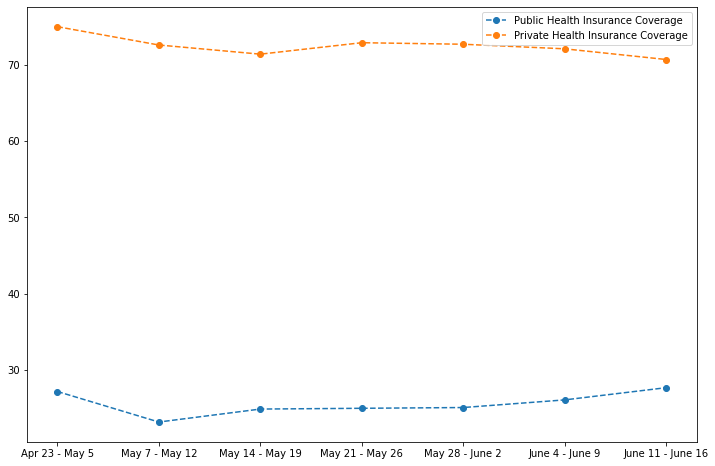

In [7]:
df1 = dfcali[dfcali["Indicator"] == "Uninsured at the Time of Interview"]
df2 = dfcali[dfcali["Indicator"] == "Public Health Insurance Coverage"]
df3 = dfcali[dfcali["Indicator"] == "Private Health Insurance Coverage"]

x = df1["Week Label"]
y1 = df1["Value"]
y2 = df2["Value"]
y3 = df3["Value"]
plt.figure(figsize=(12,8))
# plt.plot(x,y1,label="Uninsured at the Time of Interview")
plt.plot(x,y2,label="Public Health Insurance Coverage",marker='o', linestyle='dashed')
plt.plot(x,y3,label="Private Health Insurance Coverage",marker='o', linestyle='dashed')
plt.legend();

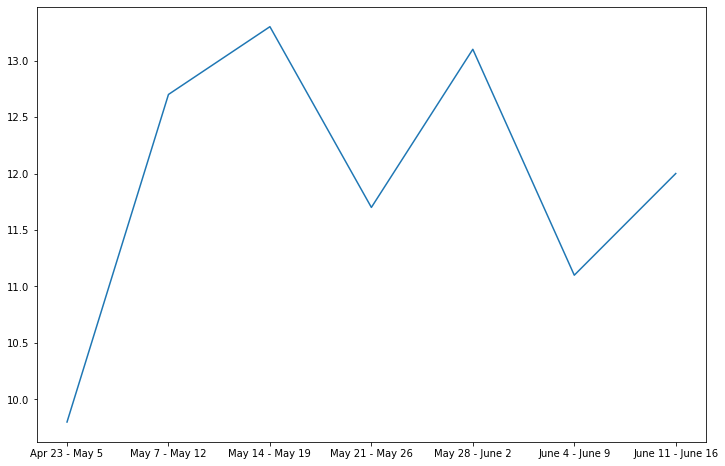

In [8]:
plt.figure(figsize=(12,8))
plt.plot(x,y1,label="Uninsured at the Time of Interview")

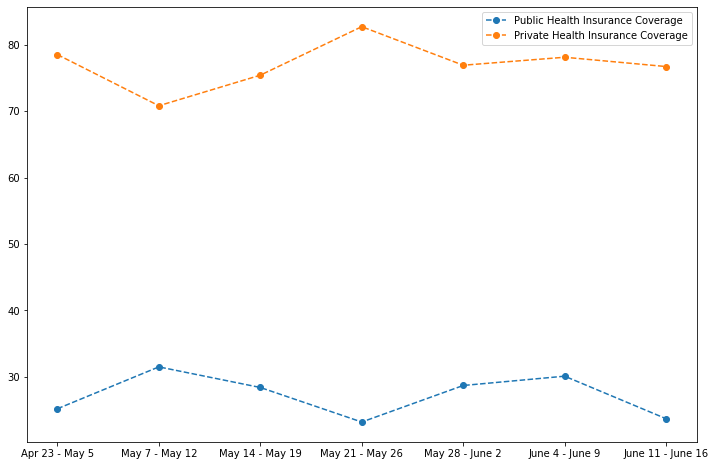

In [9]:
dfny = df[df["State"] == "New York"]

df1 = dfny[dfny["Indicator"] == "Uninsured at the Time of Interview"]
df2 = dfny[dfny["Indicator"] == "Public Health Insurance Coverage"]
df3 = dfny[dfny["Indicator"] == "Private Health Insurance Coverage"]

x = df1["Week Label"]
y1 = df1["Value"]
y2 = df2["Value"]
y3 = df3["Value"]
plt.figure(figsize=(12,8))
# plt.plot(x,y1,label="Uninsured at the Time of Interview",marker='o', linestyle='dashed')
plt.plot(x,y2,label="Public Health Insurance Coverage",marker='o', linestyle='dashed')
plt.plot(x,y3,label="Private Health Insurance Coverage",marker='o', linestyle='dashed')
plt.legend();

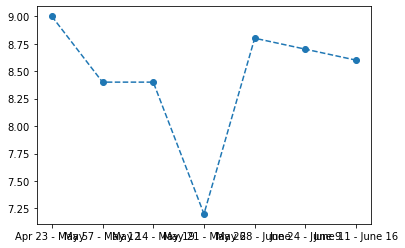

In [10]:
plt.plot(x,y1,label="Uninsured at the Time of Interview",marker='o', linestyle='dashed')

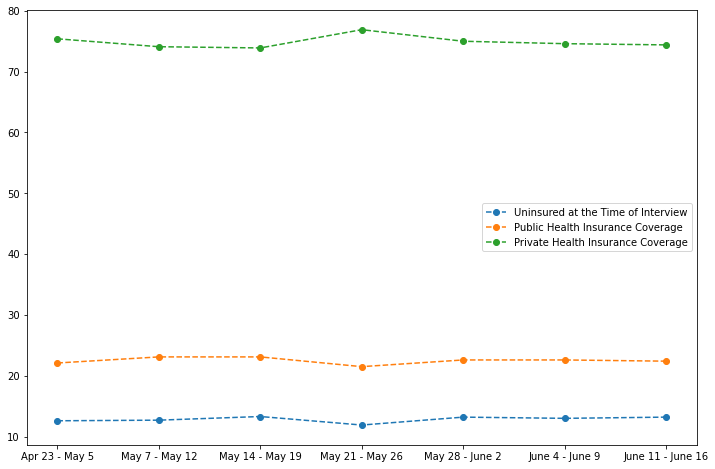

In [11]:
dfusa = df[df["Group"] == "National Estimate"]

df1 = dfusa[dfusa["Indicator"] == "Uninsured at the Time of Interview"]
df2 = dfusa[dfusa["Indicator"] == "Public Health Insurance Coverage"]
df3 = dfusa[dfusa["Indicator"] == "Private Health Insurance Coverage"]

x = df1["Week Label"]
y1 = df1["Value"]
y2 = df2["Value"]
y3 = df3["Value"]
plt.figure(figsize=(12,8))
plt.plot(x,y1,label="Uninsured at the Time of Interview",marker='o', linestyle='dashed')
plt.plot(x,y2,label="Public Health Insurance Coverage",marker='o', linestyle='dashed')
plt.plot(x,y3,label="Private Health Insurance Coverage",marker='o', linestyle='dashed')
plt.legend();